# Convolutional Neural Network Example

Build a convolutional neural network with TensorFlow.

This example is using TensorFlow layers API, see 'convolutional_network_raw' example
for a raw TensorFlow implementation with variables.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

## CNN Overview

![CNN](http://personal.ie.cuhk.edu.hk/~ccloy/project_target_code/images/fig3.png)

## MNIST Dataset Overview

This example is using MNIST handwritten digits. The dataset contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 1. For simplicity, each image has been flattened and converted to a 1-D numpy array of 784 features (28*28).

![MNIST Dataset](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

More info: http://yann.lecun.com/exdb/mnist/

In [15]:
from __future__ import division, print_function, absolute_import

# # Import MNIST data
# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets("/tmp/data/", one_hot=False)

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Source - https://stackoverflow.com/a
# Posted by Ibrahim COBANI
# Retrieved 2025-11-24, License - CC BY-SA 4.0

import tensorflow_datasets
mnist = tensorflow_datasets.load('mnist')


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.XZDWYZ_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.XZDWYZ_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [6]:
!pip install tensorflow



In [9]:
# Training Parameters
learning_rate = 0.001
num_steps = 2000
batch_size = 128

# Network Parameters
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)
dropout = 0.25 # Dropout, probability to drop a unit

In [10]:
# Create the neural network
def conv_net(x_dict, n_classes, dropout, reuse, is_training):

    # Define a scope for reusing the variables
    with tf.variable_scope('ConvNet', reuse=reuse):
        # TF Estimator input is a dict, in case of multiple inputs
        x = x_dict['images']

        # MNIST data input is a 1-D vector of 784 features (28*28 pixels)
        # Reshape to match picture format [Height x Width x Channel]
        # Tensor input become 4-D: [Batch Size, Height, Width, Channel]
        x = tf.reshape(x, shape=[-1, 28, 28, 1])

        # Convolution Layer with 32 filters and a kernel size of 5
        conv1 = tf.layers.conv2d(x, 32, 5, activation=tf.nn.relu)
        # Max Pooling (down-sampling) with strides of 2 and kernel size of 2
        conv1 = tf.layers.max_pooling2d(conv1, 2, 2)

        # Convolution Layer with 64 filters and a kernel size of 3
        conv2 = tf.layers.conv2d(conv1, 64, 3, activation=tf.nn.relu)
        # Max Pooling (down-sampling) with strides of 2 and kernel size of 2
        conv2 = tf.layers.max_pooling2d(conv2, 2, 2)

        # Flatten the data to a 1-D vector for the fully connected layer
        fc1 = tf.contrib.layers.flatten(conv2)

        # Fully connected layer (in tf contrib folder for now)
        fc1 = tf.layers.dense(fc1, 1024)
        # Apply Dropout (if is_training is False, dropout is not applied)
        fc1 = tf.layers.dropout(fc1, rate=dropout, training=is_training)

        # Output layer, class prediction
        out = tf.layers.dense(fc1, n_classes)

    return out

In [23]:
def create_conv_model(num_classes, dropout):
    # Input shape matches your reshaped images: [batch, 28, 28, 1]
    inputs = tf.keras.Input(shape=(28, 28, 1), name="images")

    # Conv1: 32 filters, kernel size 5, ReLU
    x = tf.keras.layers.Conv2D(32, 5, activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D(pool_size=2, strides=2)(x)

    # Conv2: 64 filters, kernel size 3, ReLU
    x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=2, strides=2)(x)

    # Flatten
    x = tf.keras.layers.Flatten()(x)

    # Fully connected layer with 1024 units
    x = tf.keras.layers.Dense(1024, activation='relu')(x)

    # Dropout (Keras automatically behaves differently in training vs inference)
    x = tf.keras.layers.Dropout(dropout)(x)

    # Output layer, num_classes units
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="ConvNet")
    return model

# 🔁 This line replaces your Estimator:
# model = tf.compat.v1.estimator.Estimator(model_fn)
model = create_conv_model(num_classes=num_classes, dropout=dropout)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss='sparse_categorical_crossentropy',   # you were using sparse_softmax_cross_entropy
    metrics=['accuracy']
)


In [25]:
model =  create_conv_model(num_classes, dropout)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [29]:
num_epochs=10

In [31]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Prepare training data for Keras (TensorFlow 2.x)
x_train = x_train.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)

y_train = y_train.astype('int32')

# Train the model
model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=num_epochs,
    shuffle=True
)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 69s 143ms/step - accuracy: 0.8889 - loss: 0.3731
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 68s 145ms/step - accuracy: 0.9839 - loss: 0.0491
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 143ms/step - accuracy: 0.9913 - loss: 0.0295
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 147ms/step - accuracy: 0.9927 - loss: 0.0215
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 70s 148ms/step - accuracy: 0.9957 - loss: 0.0142
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 150ms/step - accuracy: 0.9957 - loss: 0.0133
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 70s 148ms/step - accuracy: 0.9966 - loss: 0.0106
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 154ms/step - accuracy: 0.9966 - loss: 0.0103
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 156ms/step - accuracy: 0.9972 - loss: 0.0087
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 70s 149ms/step - accuracy: 0.9973 - loss: 0.0078


In [35]:
# Prepare test data the same way as training data
x_test = x_test.astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1)

y_test = y_test.astype('int32')

# Evaluate the trained model on the test set
test_loss, test_accuracy = model.evaluate(
    x_test,
    y_test,
    batch_size=batch_size,
    verbose=1
)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9911 - loss: 0.0340
Test Loss: 0.026132730767130852
Test Accuracy: 0.9933000206947327


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


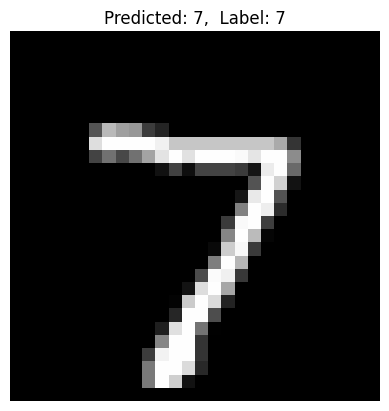

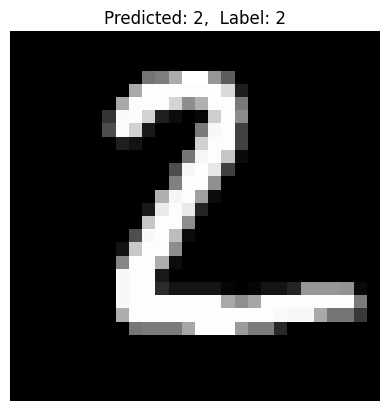

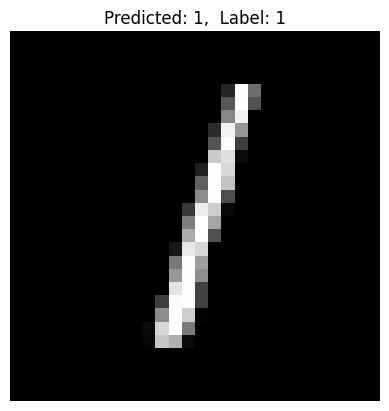

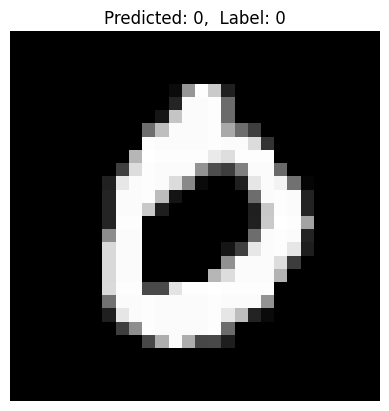

In [36]:
n_images = 4

# Get images from test set
test_images = x_test[:n_images]    # already normalized & reshaped
test_labels = y_test[:n_images]

# Predict classes
pred_probs = model.predict(test_images)
pred_classes = np.argmax(pred_probs, axis=1)

# Display results
for i in range(n_images):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {pred_classes[i]},  Label: {test_labels[i]}")
    plt.axis('off')
    plt.show()
